<a href="https://colab.research.google.com/github/AjayAajhey/NLPDSguvi/blob/main/E_commerceFinalDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from google.colab import files
files.upload()

Saving data (2).csv to data (2).csv


In [3]:
df=pd.read_csv("data (2).csv",encoding='unicode_escape')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df.drop(["InvoiceNo"], axis = 1, inplace = True) #invoiceno will not help in further analysis so dropped it
df.dropna(subset = ["CustomerID"], axis = 0, inplace = True) #dropping null values from customerid
df=df.dropna()
df.isnull().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df.isnull().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
df.duplicated().sum()
df.drop_duplicates(inplace = True) 

In [17]:
df.Description.isnull().sum() 


0

In [18]:
df['InvoiceDate']=df['InvoiceDate'].astype('datetime64[ns]') 
df['CustomerID']=df['CustomerID'].astype(int)
df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [19]:
df.Quantity.describe()


count    401564.000000
mean         12.183293
std         250.295275
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [20]:
df.Quantity.min()

-80995

In [21]:
df.loc[df.Quantity < 0,'Quantity']  = 12
#replaced negative values with mean value of quantity


In [22]:
df.Quantity.describe()


count    401564.000000
mean         13.128346
std         179.580147
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [23]:
df.UnitPrice.describe()


count    401564.000000
mean          3.474075
std          69.767499
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [24]:
sum(df.UnitPrice == 0) 


40

In [25]:
df.loc[df.UnitPrice ==0,'UnitPrice']  = 3.4
#replacing null values in unit price with mean of unit price

In [26]:
df.UnitPrice.describe()


count    401564.000000
mean          3.474414
std          69.767491
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [28]:
print(sum(df.UnitPrice == 0)) 
print(sum(df.UnitPrice <= 0))

0
0


In [29]:
df = df.drop(labels=['StockCode'],axis=1)
df


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [30]:
df['Description'].astype(str) 


0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401564, dtype: object

# **Preprocessing data for NLP**

In [31]:
df['description_processed'] = df['Description'].str.replace("[^a-zA-Z]", " ")
df.sample(10) #checking difference between processed_description vs original description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
144768,PINK POLKADOT BOWL,72,2011-04-04 12:54:00,1.06,16422,United Kingdom,PINK POLKADOT BOWL
529740,POSTAGE,3,2011-12-06 09:56:00,45.00,12478,Greece,POSTAGE
345996,BAKING SET SPACEBOY DESIGN,1,2011-09-18 15:32:00,4.95,14769,United Kingdom,BAKING SET SPACEBOY DESIGN
378820,EAU DE NILE HEART SHAPE PHOTO FRAME,2,2011-10-05 13:47:00,1.65,14730,United Kingdom,EAU DE NILE HEART SHAPE PHOTO FRAME
17820,VINTAGE UNION JACK APRON,1,2010-12-08 12:46:00,6.95,17341,United Kingdom,VINTAGE UNION JACK APRON
101090,IVORY DINER WALL CLOCK,2,2011-02-24 12:27:00,8.50,14880,United Kingdom,IVORY DINER WALL CLOCK
142192,VINTAGE PAISLEY STATIONERY SET,6,2011-04-01 10:05:00,2.95,13626,United Kingdom,VINTAGE PAISLEY STATIONERY SET
479483,PAPER CHAIN KIT VINTAGE CHRISTMAS,2,2011-11-18 10:41:00,2.95,16511,United Kingdom,PAPER CHAIN KIT VINTAGE CHRISTMAS
113721,IVORY KITCHEN SCALES,1,2011-03-08 14:12:00,8.50,14367,United Kingdom,IVORY KITCHEN SCALES
174651,ZINC T-LIGHT HOLDER STARS SMALL,216,2011-05-04 13:22:00,0.72,17394,United Kingdom,ZINC T LIGHT HOLDER STARS SMALL


In [32]:
df['description_processed'] = df['description_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df
#replacing short words


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,WHITE HANGING HEART LIGHT HOLDER
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,PACK SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,CHILDREN APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,CHILDRENS CUTLERY CIRCUS PARADE


In [33]:
df['description_processed'] = [review.lower() for review in df['description_processed']] #converting  to lower case
df.head()


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,white hanging heart light holder
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,red woolly hottie white heart


**Removing stop words**

In [34]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stopwords = stopwords.words('english')

add_words = ['set','design','heart','red','blue','pink','white','black','dark','pack','yellow','orange'] #custom list of words to be removed
# Adding to the list of words
stopwords.extend(add_words)

#to remove stop words
def remove_stopwords(rev):
  review_tokenized= word_tokenize(rev)
  rev_new = " ".join([i for i in review_tokenized if i not in stopwords])
  return rev_new

# Removing stopwords
df['description_processed'] = [remove_stopwords(r) for r in df['description_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,hanging light holder
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,metal lantern
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,woolly hottie


**Lemmatization**

In [36]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    #tuple of (token, wordnet_tag)     # convert detailed POS into shallow POS
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            if tag == wordnet.NOUN:
              lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            
    return " ".join(lemmatized_sentence)


df['description_processed'] = df['description_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [37]:
df1 = df["description_processed"].drop_duplicates() #dropping duplicates from the description data
df1 = pd.DataFrame(df1)
df1.head()


,description_processed
0,light holder
1,metal lantern
2,cream cupid heart coat hanger
3,union flag water bottle
4,


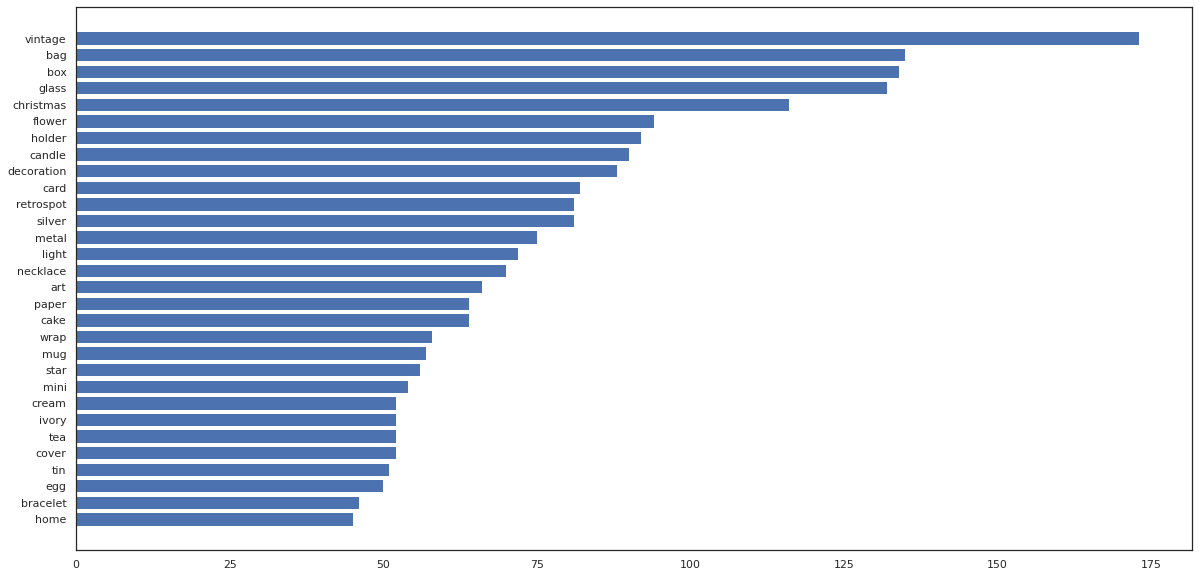

In [38]:
#plotting most frequent words from the description using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df1['description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)


# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 
words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()


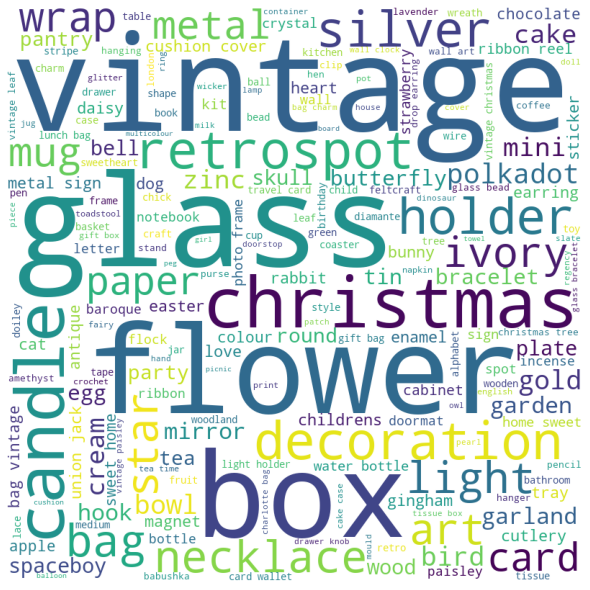

In [39]:
from wordcloud import WordCloud # to build word cloud
all_words = ' '.join([text for text in df1['description_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


In [40]:

#BAG OF WORDS MODEL
# Importing module
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False) 

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df1['description_processed']) 
# fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df3 = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
df3.head()

,acapulco,account,acrylic,address,adult,advent,ahoy,aid,air,airline,...,woodland,wool,word,work,world,wrap,wreath,xmas,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x = bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Building the ML model**

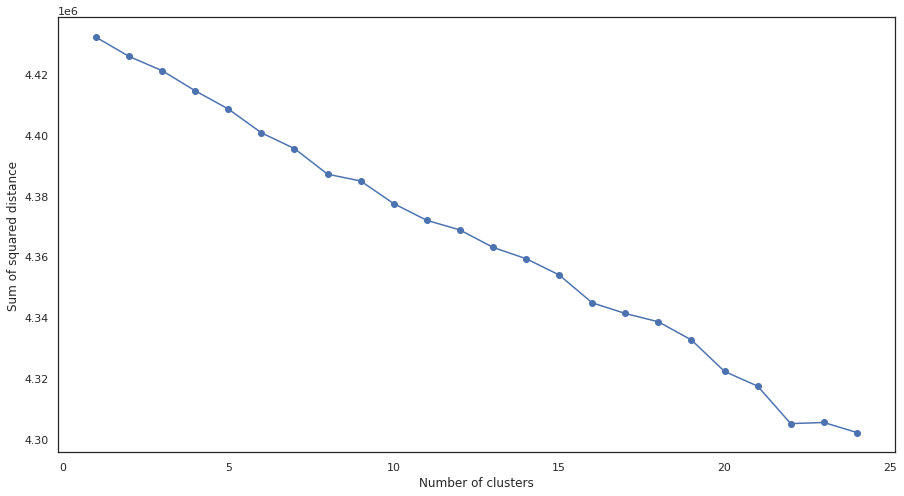

In [43]:
#K means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sc = StandardScaler()
X_scaled = sc.fit_transform(x)


#Elbow Plot
list_k = list(range(1, 25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plot to see against k value
plt.figure(figsize=(15,8))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');


In [44]:
km = KMeans(n_clusters=18) # applying k = 18
km.fit(X_scaled) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points

In [45]:
np.unique(km.labels_)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int32)

In [46]:
label = km.fit_predict(X_scaled)  
print(label)


[4 4 4 ... 4 4 4]


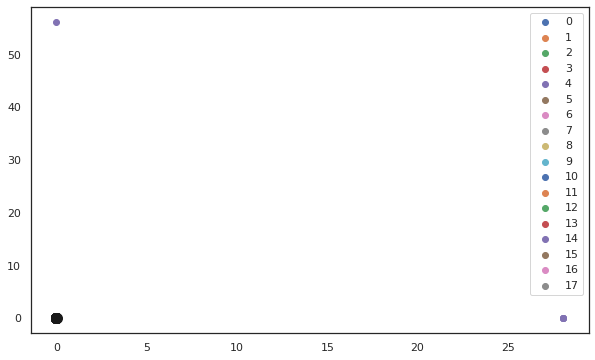

In [47]:
centroids = km.cluster_centers_
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in labels:
    plt.scatter(X_scaled[label == i , 0] , X_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, c = 'k')
plt.legend()
plt.show()

In [48]:
df3 = pd.DataFrame(km.labels_)
print(df3.shape)
df3

(3159, 1)


,0
0,4
1,4
2,4
3,4
4,4
...,...
3154,4
3155,4
3156,4
3157,4


In [49]:
print(df1.shape)
df1

(3159, 1)


,description_processed
0,light holder
1,metal lantern
2,cream cupid heart coat hanger
3,union flag water bottle
4,
...,...
503375,snack tray vintage
504104,ribbon party
530382,skull phone charm
537621,cream holder


In [50]:
df1 = df1.reset_index(drop=True)


In [51]:
newdf = df1.join(df3)
print(newdf.shape)
newdf

(3159, 2)


,description_processed,0
0,light holder,4
1,metal lantern,4
2,cream cupid heart coat hanger,4
3,union flag water bottle,4
4,,4
...,...,...
3154,snack tray vintage,4
3155,ribbon party,4
3156,skull phone charm,4
3157,cream holder,4


In [52]:
newdf.rename(columns={0:'clusters'},inplace=True) #renaming to clusters
newdf.head()


,description_processed,clusters
0,light holder,4
1,metal lantern,4
2,cream cupid heart coat hanger,4
3,union flag water bottle,4
4,,4


In [53]:
DF = pd.merge(df, newdf, how='left', on='description_processed') #merging data frame
DF

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed,clusters
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,light holder,4
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,metal lantern,4
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid heart coat hanger,4
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,union flag water bottle,4
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,,4
...,...,...,...,...,...,...,...,...
401559,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,spaceboy napkin,4
401560,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,child,4
401561,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens,4
401562,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens circus parade,4


In [54]:
one_hot=pd.concat([DF, pd.get_dummies(DF["clusters"])],axis=1)
one_hot
#one hot encoding

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed,clusters,0,1,...,8,9,10,11,12,13,14,15,16,17
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,light holder,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,metal lantern,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid heart coat hanger,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,union flag water bottle,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401559,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,spaceboy napkin,4,0,0,...,0,0,0,0,0,0,0,0,0,0
401560,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,child,4,0,0,...,0,0,0,0,0,0,0,0,0,0
401561,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens,4,0,0,...,0,0,0,0,0,0,0,0,0,0
401562,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens circus parade,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
one_hot.groupby(['CustomerID']).mean()
#grouping by customer id

,Quantity,UnitPrice,clusters,0,1,2,3,4,5,6,...,8,9,10,11,12,13,14,15,16,17
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,37113.500000,1.040000,4.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
12347,13.505495,2.644011,4.175824,0.0,0.0,0.0,0.0,0.983516,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.005495,0.0,0.0,0.0,0.010989,0.0
12348,75.516129,5.764839,5.290323,0.0,0.0,0.0,0.0,0.838710,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.161290,0.0,0.0,0.0,0.000000,0.0
12349,8.643836,8.289041,4.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
12350,11.588235,3.841176,4.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,4.500000,4.765000,4.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
18281,7.714286,5.622857,4.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
18282,8.846154,4.821538,4.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [56]:
one_hot.isnull().sum() #checking for null values


Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID               0
Country                  0
description_processed    0
clusters                 0
0                        0
1                        0
2                        0
3                        0
4                        0
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
11                       0
12                       0
13                       0
14                       0
15                       0
16                       0
17                       0
dtype: int64

In [57]:
df5=one_hot.drop(columns=['InvoiceDate','description_processed'])

df5=df5.reset_index(drop=True) #Dropping Invoicedate & description processed


In [58]:
df5 = df5.drop(columns=['Description'],axis=1)


In [59]:
df5=df5.reset_index(drop=True)
df5

,Quantity,UnitPrice,CustomerID,Country,clusters,0,1,2,3,4,...,8,9,10,11,12,13,14,15,16,17
0,6,2.55,17850,United Kingdom,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,3.39,17850,United Kingdom,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8,2.75,17850,United Kingdom,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,3.39,17850,United Kingdom,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,6,3.39,17850,United Kingdom,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401559,12,0.85,12680,France,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
401560,6,2.10,12680,France,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
401561,4,4.15,12680,France,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
401562,4,4.15,12680,France,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Label Encoding**

In [60]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_coun=en.fit_transform(df5['Country'])
df7=pd.DataFrame(Encode_coun,columns=['New_country'])

df7


,New_country
0,35
1,35
2,35
3,35
4,35
...,...
401559,13
401560,13
401561,13
401562,13


In [61]:
df7.isnull().sum()


New_country    0
dtype: int64

In [62]:
df5 = pd.concat([df5,df7],axis=1)
df5.CustomerID = df5.CustomerID.astype(int) #Converting customerid to int
df5=df5.drop(columns=['Country','clusters']) #dropping country & cluster columns
df5


,Quantity,UnitPrice,CustomerID,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,New_country
0,6,2.55,17850,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,35
1,6,3.39,17850,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,35
2,8,2.75,17850,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,35
3,6,3.39,17850,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,35
4,6,3.39,17850,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401559,12,0.85,12680,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13
401560,6,2.10,12680,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13
401561,4,4.15,12680,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13
401562,4,4.15,12680,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [63]:
df5=df5.dropna()

In [64]:
df9=df5.groupby('CustomerID').mean() 
df9=df9.reset_index(drop=True)
df9

,Quantity,UnitPrice,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,New_country
0,37113.500000,1.040000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,35.0
1,13.505495,2.644011,0.0,0.0,0.0,0.0,0.983516,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.005495,0.0,0.0,0.0,0.010989,0.0,16.0
2,75.516129,5.764839,0.0,0.0,0.0,0.0,0.838710,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.161290,0.0,0.0,0.0,0.000000,0.0,12.0
3,8.643836,8.289041,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,18.0
4,11.588235,3.841176,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4.500000,4.765000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,35.0
4368,7.714286,5.622857,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,35.0
4369,8.846154,4.821538,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,35.0
4370,1.882108,1.628752,0.0,0.0,0.0,0.0,0.990291,0.0,0.008322,0.0,...,0.0,0.0,0.0,0.001387,0.0,0.0,0.0,0.000000,0.0,35.0


In [65]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_cus=en.fit_transform(df5['CustomerID'])
df10=pd.DataFrame(Encode_cus,columns=['Encode_cus'])

df10


,Encode_cus
0,4048
1,4048
2,4048
3,4048
4,4048
...,...
401559,275
401560,275
401561,275
401562,275


In [66]:
#reset index, drop duplicates
df10=df10.reset_index(drop=True)
df10=df10.drop_duplicates()
df10=df10.reset_index(drop=True)
df10


,Encode_cus
0,4048
1,540
2,191
3,1047
4,2029
...,...
4367,823
4368,2346
4369,723
4370,1649


In [67]:
df11=pd.concat([df10,df9],axis=1)
df11


,Encode_cus,Quantity,UnitPrice,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,New_country
0,4048,37113.500000,1.040000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,35.0
1,540,13.505495,2.644011,0.0,0.0,0.0,0.0,0.983516,0.0,0.000000,...,0.0,0.0,0.0,0.005495,0.0,0.0,0.0,0.010989,0.0,16.0
2,191,75.516129,5.764839,0.0,0.0,0.0,0.0,0.838710,0.0,0.000000,...,0.0,0.0,0.0,0.161290,0.0,0.0,0.0,0.000000,0.0,12.0
3,1047,8.643836,8.289041,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,18.0
4,2029,11.588235,3.841176,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,823,4.500000,4.765000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,35.0
4368,2346,7.714286,5.622857,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,35.0
4369,723,8.846154,4.821538,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,35.0
4370,1649,1.882108,1.628752,0.0,0.0,0.0,0.0,0.990291,0.0,0.008322,...,0.0,0.0,0.0,0.001387,0.0,0.0,0.0,0.000000,0.0,35.0


In [68]:
val=df11.values


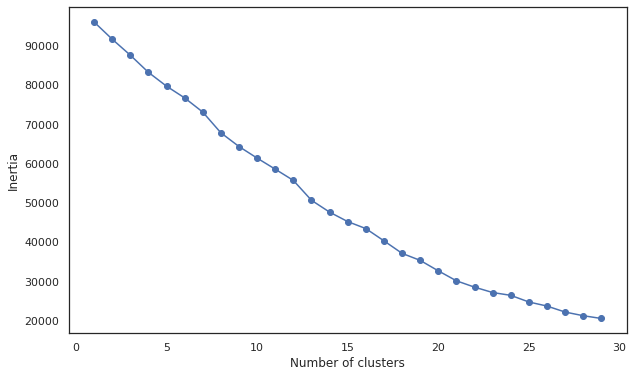

In [69]:
#with scaling
scale=StandardScaler()
X=scale.fit_transform(val)
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Inertia');


In [70]:
km = KMeans(n_clusters=22)  #k value = 22
km.fit(X)

KMeans(n_clusters=22)

In [71]:
KMeans(n_clusters=22)


KMeans(n_clusters=22)

In [72]:
cus_group=pd.DataFrame(km.labels_,columns=['customer_Group']) #grouping by customer
cus_group


,customer_Group
0,8
1,5
2,9
3,5
4,0
...,...
4367,0
4368,6
4369,0
4370,0


In [73]:
f=pd.concat([df11['Encode_cus'],cus_group],axis=1)
f


,Encode_cus,customer_Group
0,4048,8
1,540,5
2,191,9
3,1047,5
4,2029,0
...,...,...
4367,823,0
4368,2346,6
4369,723,0
4370,1649,0


In [74]:
import plotly.express as px
fig=px.scatter(f,x='Encode_cus',y='customer_Group')
fig.show()


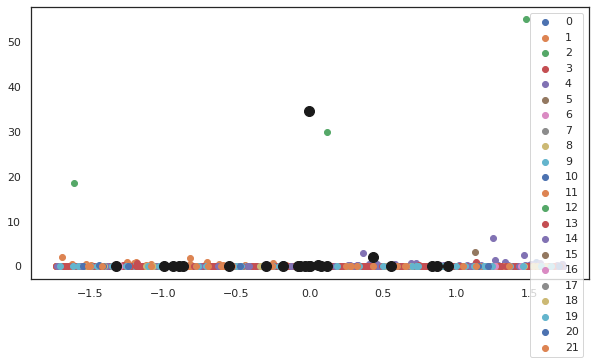

In [75]:
#Getting the Centroids
centroids = km.cluster_centers_
label=km.fit_predict(X)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 5)) 
for i in labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()
